# Data Analysis with Python - Credit Card Dataset for Clustering
Important links: 
+ Gihub
+ Colab Google

## Evalution Criteria
Submission will be evaluated using the follow criteria: 
+ Nothing

# This Python3 environment comes with many helpful analytics libraries installed



## Part 1: Data preprocessing
Dataset link: https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

## Importing the libraries and the dataset


In [474]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [475]:
import os 
for dirname, _, filenames in os.walk('/content'): 
  for filename in filenames: 
    print(os.path.join(dirname, filename))


/content/CC GENERAL.csv
/content/Segmented_customers
/content/.config/config_sentinel
/content/.config/.last_update_check.json
/content/.config/.last_opt_in_prompt.yaml
/content/.config/active_config
/content/.config/gce
/content/.config/.last_survey_prompt.yaml
/content/.config/configurations/config_default
/content/.config/logs/2022.09.09/13.22.21.505460.log
/content/.config/logs/2022.09.09/13.21.10.547632.log
/content/.config/logs/2022.09.09/13.21.52.077555.log
/content/.config/logs/2022.09.09/13.22.20.752199.log
/content/.config/logs/2022.09.09/13.21.32.402746.log
/content/.config/logs/2022.09.09/13.22.00.334156.log
/content/sample_data/anscombe.json
/content/sample_data/README.md
/content/sample_data/mnist_train_small.csv
/content/sample_data/california_housing_test.csv
/content/sample_data/mnist_test.csv
/content/sample_data/california_housing_train.csv


In [476]:
dataset = pd.read_csv('/content/CC GENERAL.csv')
dr =  pd.read_csv('/content/CC GENERAL.csv')

In [477]:
dataset.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [478]:
dataset.shape


(8950, 18)

In [479]:
dataset.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [480]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [481]:
# categorical colums 
dataset.select_dtypes(include='object').columns

Index(['CUST_ID'], dtype='object')

In [482]:
len(dataset.select_dtypes(include='object').columns)

1

In [483]:
# numerical columns 
dataset.select_dtypes(include=['int64','float64']).columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [484]:
# statistical summary
dataset.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f285ff2fc50>,
      dtype=object)

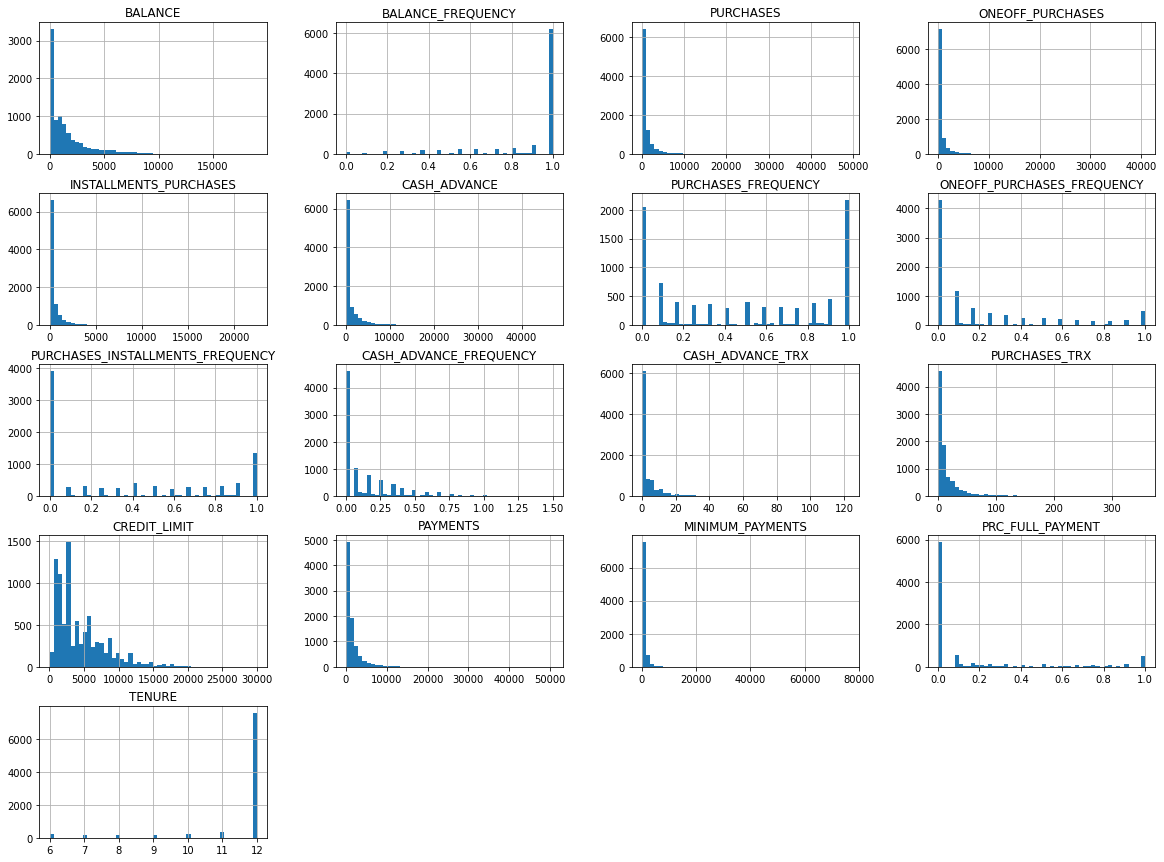

In [485]:
# each series in the DataFrame
dataset.hist(bins = 50, figsize = (20,15))

### Dealing with missing values

In [486]:
dataset.isnull().values.any()

True

In [487]:
dataset.isnull().values.sum()

314

In [488]:
dataset.columns[dataset.isnull().any()]

Index(['CREDIT_LIMIT', 'MINIMUM_PAYMENTS'], dtype='object')

In [489]:
len(dataset.columns[dataset.isnull().any()])

2

In [490]:
dataset.isnull().sum().sort_values(ascending=False).head()

MINIMUM_PAYMENTS    313
CREDIT_LIMIT          1
CUST_ID               0
BALANCE               0
PRC_FULL_PAYMENT      0
dtype: int64

In [491]:
dataset['CREDIT_LIMIT'] = dataset['CREDIT_LIMIT'].fillna(dataset['CREDIT_LIMIT'].mean())
dataset['MINIMUM_PAYMENTS'] = dataset['MINIMUM_PAYMENTS'].fillna(dataset['MINIMUM_PAYMENTS'].mean())

In [492]:
len(dataset.columns[dataset.isnull().any()])

0

### Encoding categorical data

In [493]:
# categorical columns
dataset.select_dtypes(include='object').columns

Index(['CUST_ID'], dtype='object')

In [494]:
dataset.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [495]:
dataset = dataset.drop(columns='CUST_ID')

In [496]:
dataset.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [497]:
# categorical columns
dataset.select_dtypes(include='object').columns

Index([], dtype='object')

In [498]:
len(# categorical columns
dataset.select_dtypes(include='object').columns)

0

### Correlation matrix 

In [499]:
corr = dataset.corr()

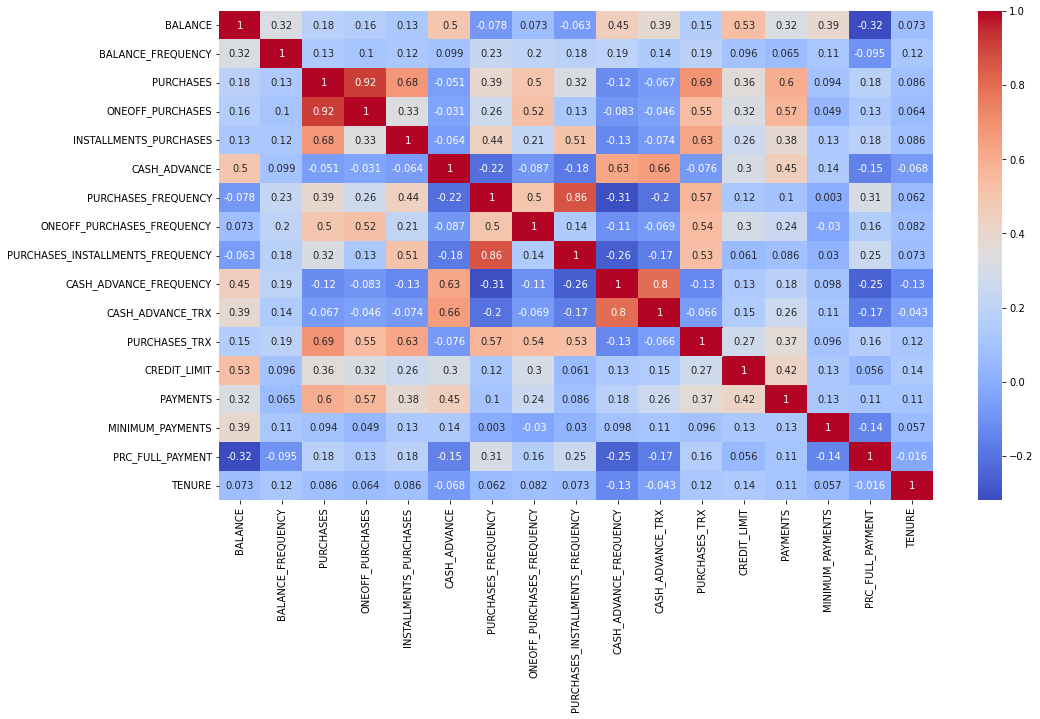

In [500]:
# heatmap 
plt.figure(figsize=(16, 9))
ax = sns.heatmap(corr, annot=True, cmap='coolwarm')

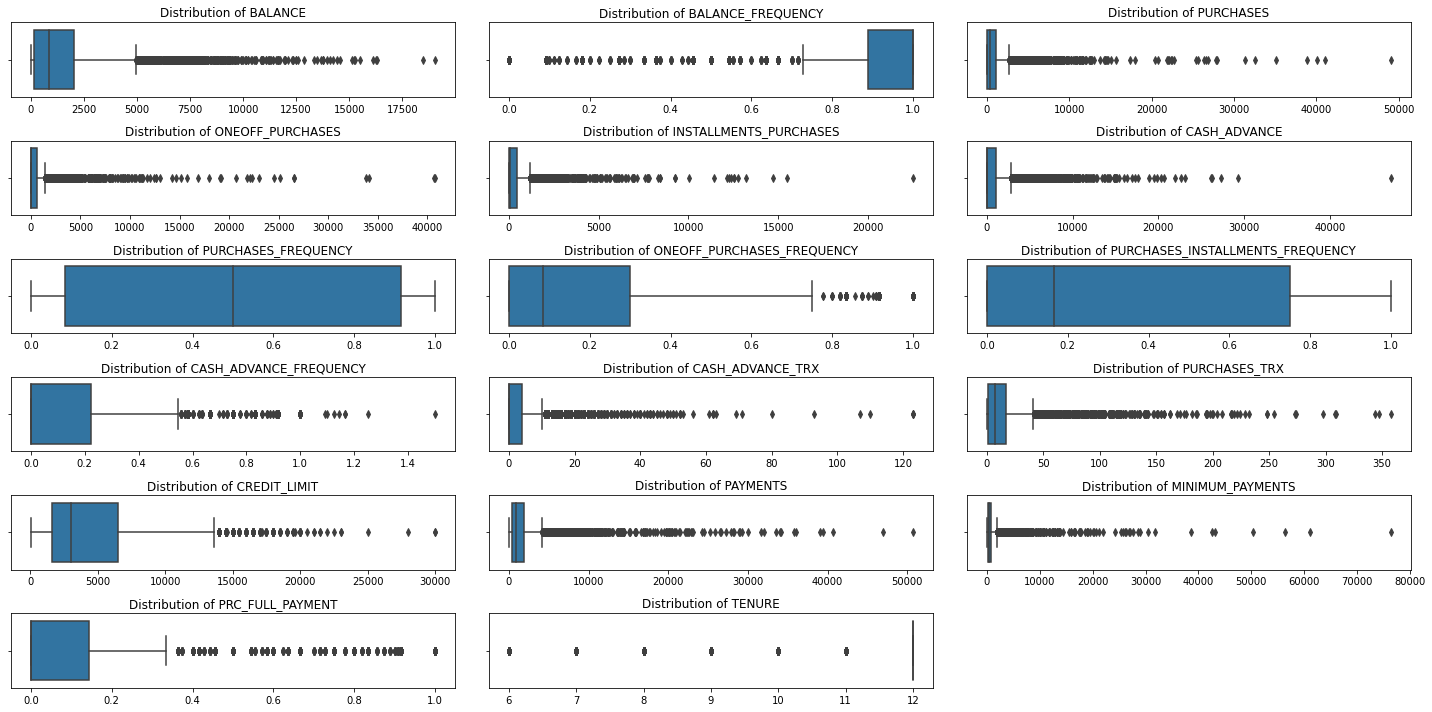

In [501]:
fig = plt.figure(figsize=(20, 10)) # sets the size of the 4 plot with width as 10 and height as 10
for i,columns in enumerate(dataset.columns, 1): 
    ax = plt.subplot(6,3,i) # creates 3 subplots in one single row
    sns.boxplot(data = dataset, x=dataset[columns], ) # creates box plots for each feature in df_cont dataset
    ax.set_xlabel(None) # removes the labels on x-axis
    ax.set_title(f'Distribution of {columns}') # adds a title to each subplot
    plt.tight_layout(w_pad=3) # adds padding between the subplots
plt.show()

### Splitting the dataset

In [502]:
 # only independent variables not target variable

### Dealing with Outliers
By dropping outliers we can lose many row as there are too many outliers in dataset. So making ranges to deal with extreme values. 

In [503]:

data = dataset


In [504]:
columns=['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT',
        'PAYMENTS', 'MINIMUM_PAYMENTS']

for c in columns:
    
    Range=c+'_RANGE'
    data[Range]=0        
    data.loc[((data[c]>0)&(data[c]<=500)),Range]=1
    data.loc[((data[c]>500)&(data[c]<=1000)),Range]=2
    data.loc[((data[c]>1000)&(data[c]<=3000)),Range]=3
    data.loc[((data[c]>3000)&(data[c]<=5000)),Range]=4
    data.loc[((data[c]>5000)&(data[c]<=10000)),Range]=5
    data.loc[((data[c]>10000)),Range]=6
 

In [505]:
columns=['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 
         'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT']

for c in columns:
    
    Range=c+'_RANGE'
    data[Range]=0
    data.loc[((data[c]>0)&(data[c]<=0.1)),Range]=1
    data.loc[((data[c]>0.1)&(data[c]<=0.2)),Range]=2
    data.loc[((data[c]>0.2)&(data[c]<=0.3)),Range]=3
    data.loc[((data[c]>0.3)&(data[c]<=0.4)),Range]=4
    data.loc[((data[c]>0.4)&(data[c]<=0.5)),Range]=5
    data.loc[((data[c]>0.5)&(data[c]<=0.6)),Range]=6
    data.loc[((data[c]>0.6)&(data[c]<=0.7)),Range]=7
    data.loc[((data[c]>0.7)&(data[c]<=0.8)),Range]=8
    data.loc[((data[c]>0.8)&(data[c]<=0.9)),Range]=9
    data.loc[((data[c]>0.9)&(data[c]<=1.0)),Range]=10
    

In [506]:
columns=['PURCHASES_TRX', 'CASH_ADVANCE_TRX']  

for c in columns:
    
    Range=c+'_RANGE'
    data[Range]=0
    data.loc[((data[c]>0)&(data[c]<=5)),Range]=1
    data.loc[((data[c]>5)&(data[c]<=10)),Range]=2
    data.loc[((data[c]>10)&(data[c]<=15)),Range]=3
    data.loc[((data[c]>15)&(data[c]<=20)),Range]=4
    data.loc[((data[c]>20)&(data[c]<=30)),Range]=5
    data.loc[((data[c]>30)&(data[c]<=50)),Range]=6
    data.loc[((data[c]>50)&(data[c]<=100)),Range]=7
    data.loc[((data[c]>100)),Range]=8

In [507]:
dr.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [508]:
data.drop(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY',  'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT' ], axis=1, inplace=True)

X = np.asarray(data)

In [509]:
X

array([[12,  1,  1, ...,  0,  1,  0],
       [12,  4,  0, ...,  3,  0,  1],
       [12,  3,  2, ...,  0,  3,  0],
       ...,
       [ 6,  1,  1, ...,  3,  1,  0],
       [ 6,  1,  0, ...,  3,  0,  1],
       [ 6,  1,  3, ...,  0,  5,  1]])

### Feature scaling

In [510]:
# StandardScaler 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X.shape

(8950, 17)

In [511]:
X

array([[ 0.36067954, -0.97851102, -0.43862278, ..., -0.54119881,
        -0.64681226, -0.69462206],
       [ 0.36067954,  1.29798329, -1.18015543, ...,  0.45299851,
        -1.09971241,  0.12597818],
       [ 0.36067954,  0.53915185,  0.30290987, ..., -0.54119881,
         0.25898804, -0.69462206],
       ...,
       [-4.12276757, -0.97851102, -0.43862278, ...,  0.45299851,
        -0.64681226, -0.69462206],
       [-4.12276757, -0.97851102, -1.18015543, ...,  0.45299851,
        -1.09971241,  0.12597818],
       [-4.12276757, -0.97851102,  1.04444252, ..., -0.54119881,
         1.16478834,  0.12597818]])

## Part 2: Elbow method (finding the optimal number of clusters)


In [512]:
from sklearn.cluster import KMeans

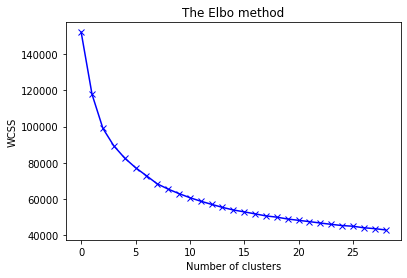

In [513]:
n_clusters = 30;
wcss = []
for i in range(1, n_clusters): 
  kmeans = KMeans(i)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(wcss, 'bx-')
plt.title('The Elbo method')
plt.xlabel('Number of clusters') 
plt.ylabel('WCSS')
plt.show()


## Part 3: Building the model
Choosing 6 no of clusters¶

In [514]:
from sklearn.cluster import KMeans

In [515]:
kmeans = KMeans(6)

In [516]:
# dependent variable
kmeans.fit(X)
labels = kmeans.labels_


In [517]:
labels

array([4, 3, 5, ..., 0, 4, 5], dtype=int32)

In [518]:
clusters=pd.concat([data, pd.DataFrame({'cluster':labels})], axis=1)


In [519]:
clusters.head()

,TENURE,BALANCE_RANGE,PURCHASES_RANGE,ONEOFF_PURCHASES_RANGE,INSTALLMENTS_PURCHASES_RANGE,CASH_ADVANCE_RANGE,CREDIT_LIMIT_RANGE,PAYMENTS_RANGE,MINIMUM_PAYMENTS_RANGE,BALANCE_FREQUENCY_RANGE,PURCHASES_FREQUENCY_RANGE,ONEOFF_PURCHASES_FREQUENCY_RANGE,PURCHASES_INSTALLMENTS_FREQUENCY_RANGE,CASH_ADVANCE_FREQUENCY_RANGE,PRC_FULL_PAYMENT_RANGE,PURCHASES_TRX_RANGE,CASH_ADVANCE_TRX_RANGE,cluster
0,12,1,1,0,1,0,2,1,1,9,2,0,1,0,0,1,0,4
1,12,4,0,0,0,5,5,4,3,10,0,0,0,3,3,0,1,3
2,12,3,2,2,0,0,5,2,2,10,10,10,0,0,0,3,0,5
3,12,3,3,3,0,1,5,0,2,7,1,1,0,1,0,1,1,4
4,12,2,1,1,0,0,3,2,1,10,1,1,0,0,0,1,0,4


In [520]:
dataset_final.head()

,Cluster_Number,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1,12,1,1,0,1,0,2,1,1,9,2,0,1,0,0,1,0
1,5,12,4,0,0,0,5,5,4,3,10,0,0,0,3,3,0,1
2,4,12,3,2,2,0,0,5,2,2,10,10,10,0,0,0,3,0
3,1,12,3,3,3,0,1,5,0,2,7,1,1,0,1,0,1,1
4,1,12,2,1,1,0,0,3,2,1,10,1,1,0,0,0,1,0


In [521]:
kmeans

KMeans(n_clusters=6)

## Interpretation of Clusters 

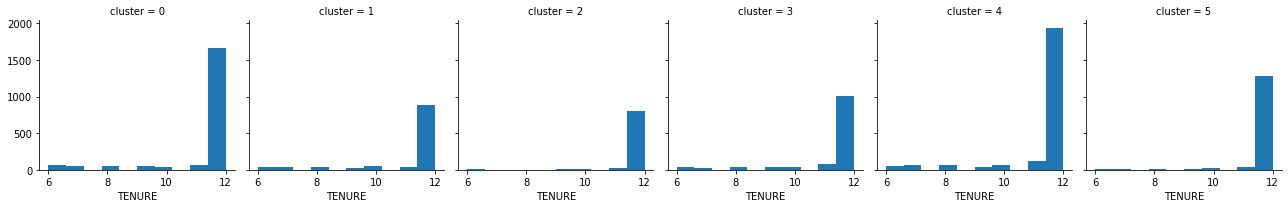

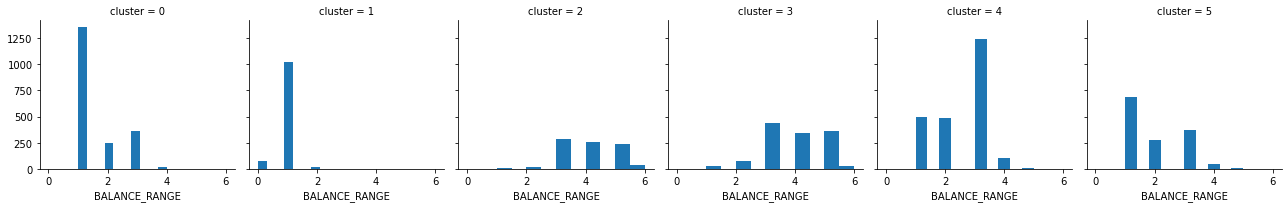

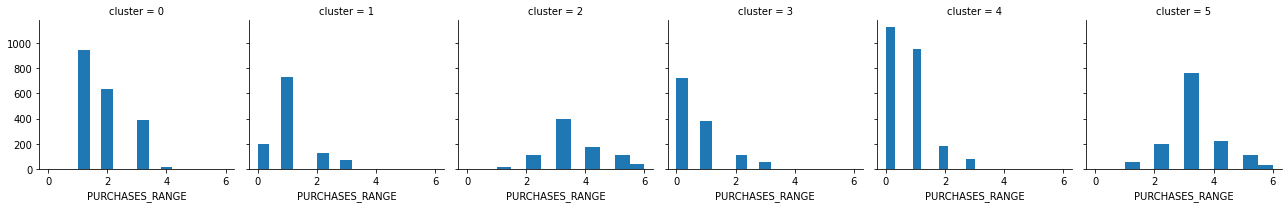

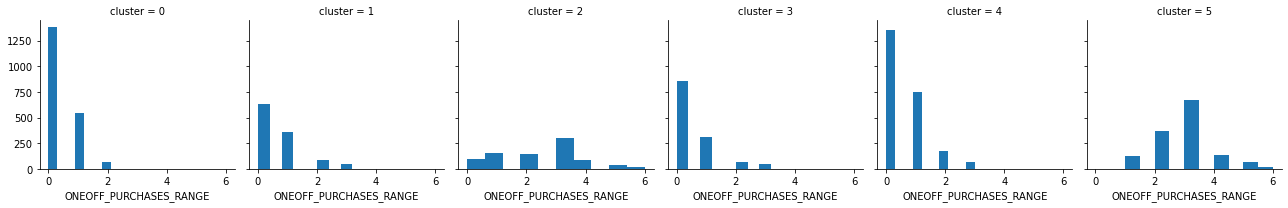

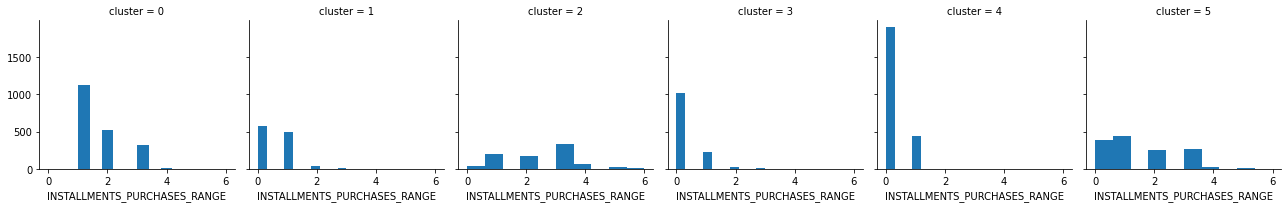

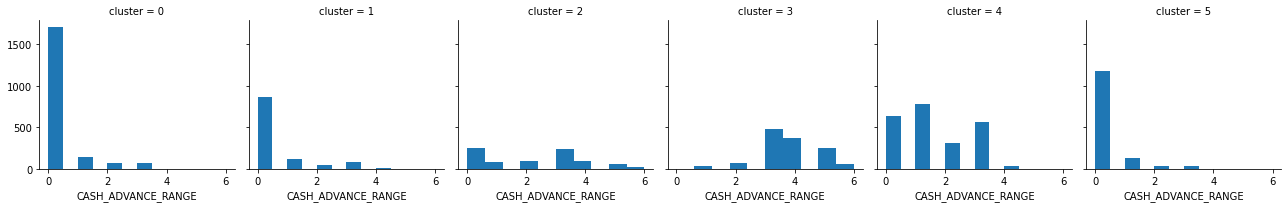

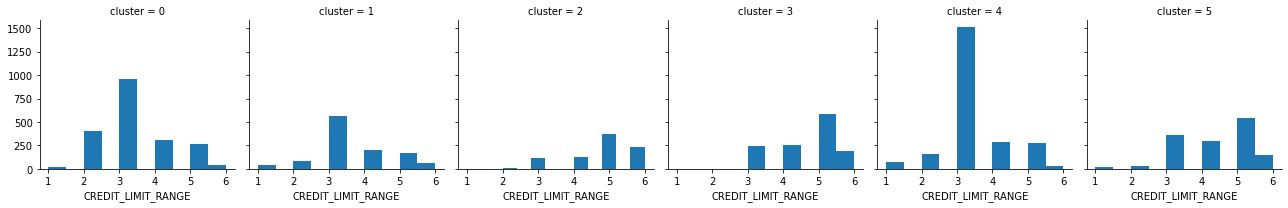

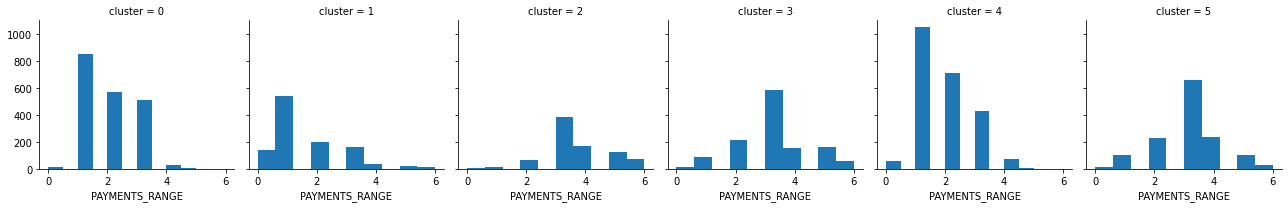

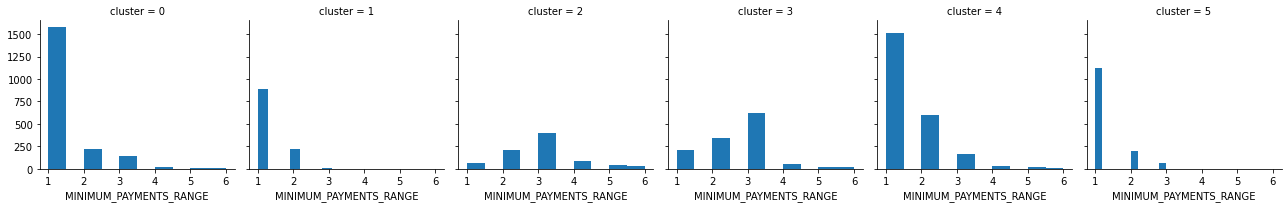

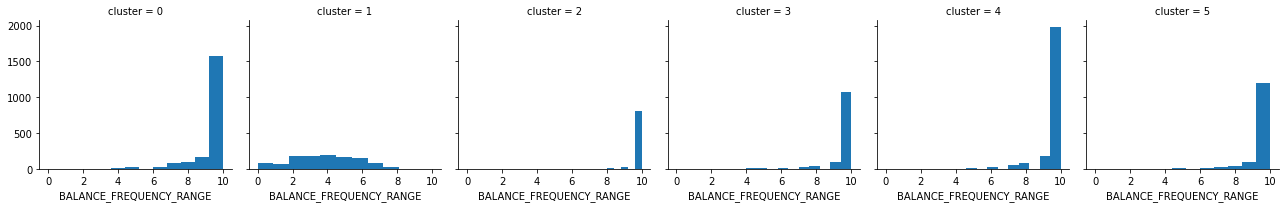

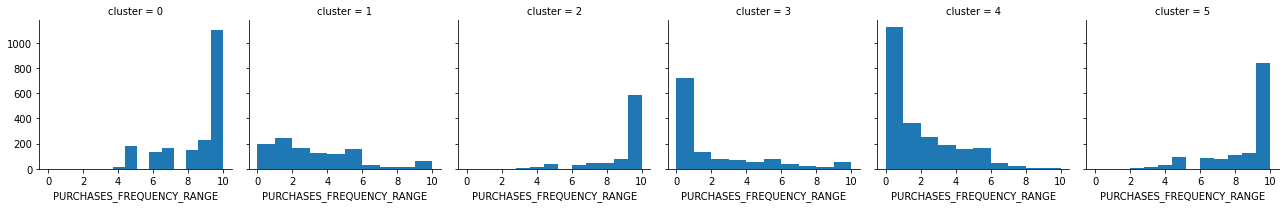

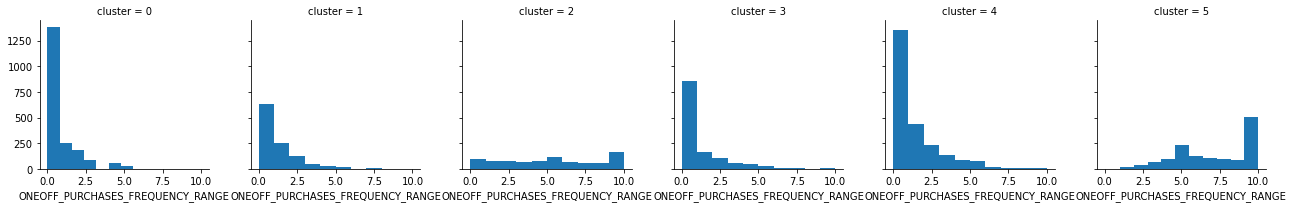

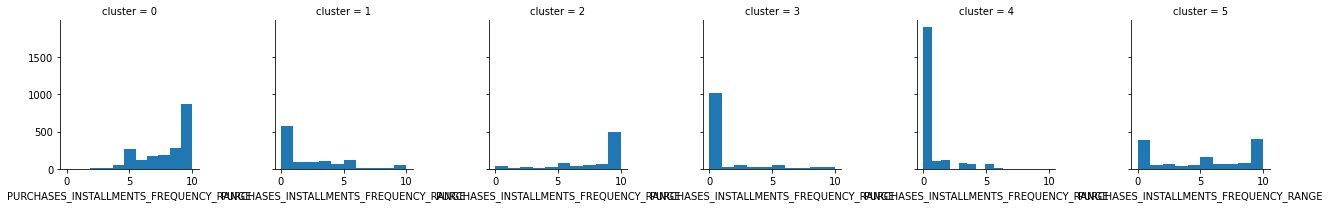

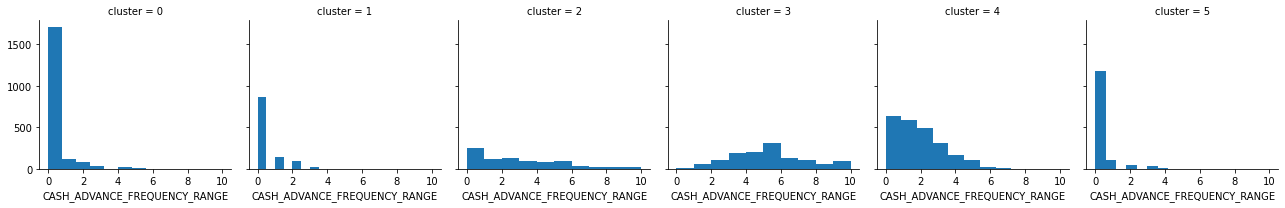

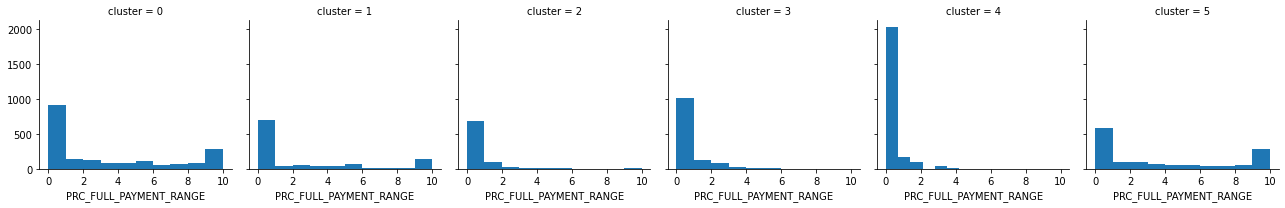

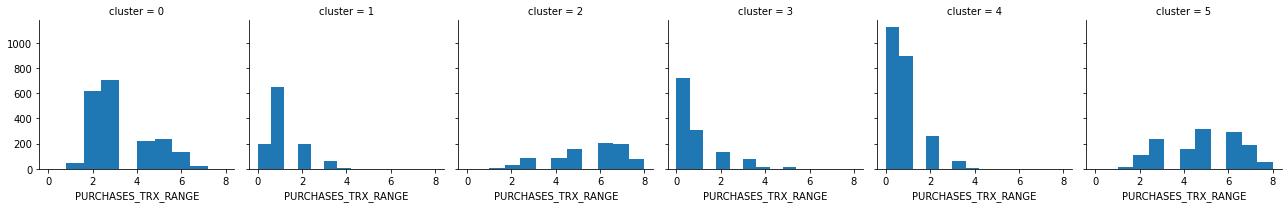

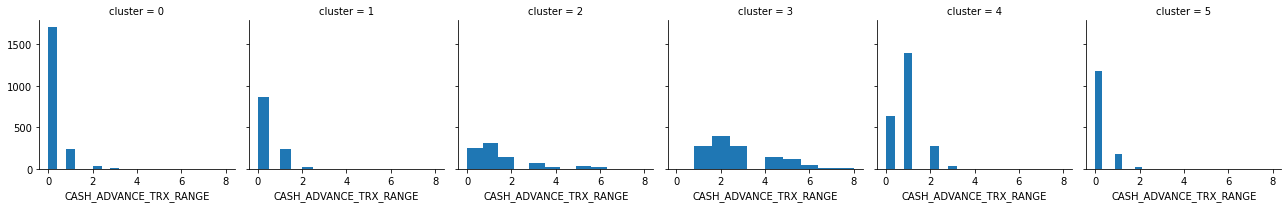

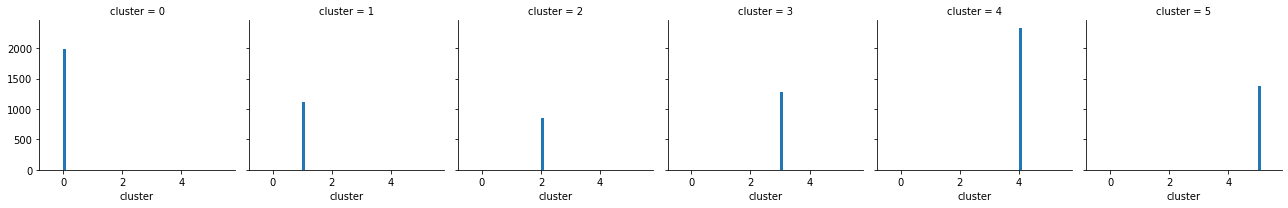

In [522]:
for c in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)   

### Part 3.5: Visualization of Clusters
Using PCA to transform data to 2 dimensions for visualization

In [523]:
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(X)

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)
X_PCA.shape

(8950, 2)

In [524]:
X_PCA

array([[-14.15765086, -33.24465181],
       [-34.2242359 ,  22.44883635],
       [ 17.88345602,  11.18004703],
       ...,
       [  5.26432157, -19.2378963 ],
       [-21.6504385 , -16.18343833],
       [  7.14068013,   2.49272326]])

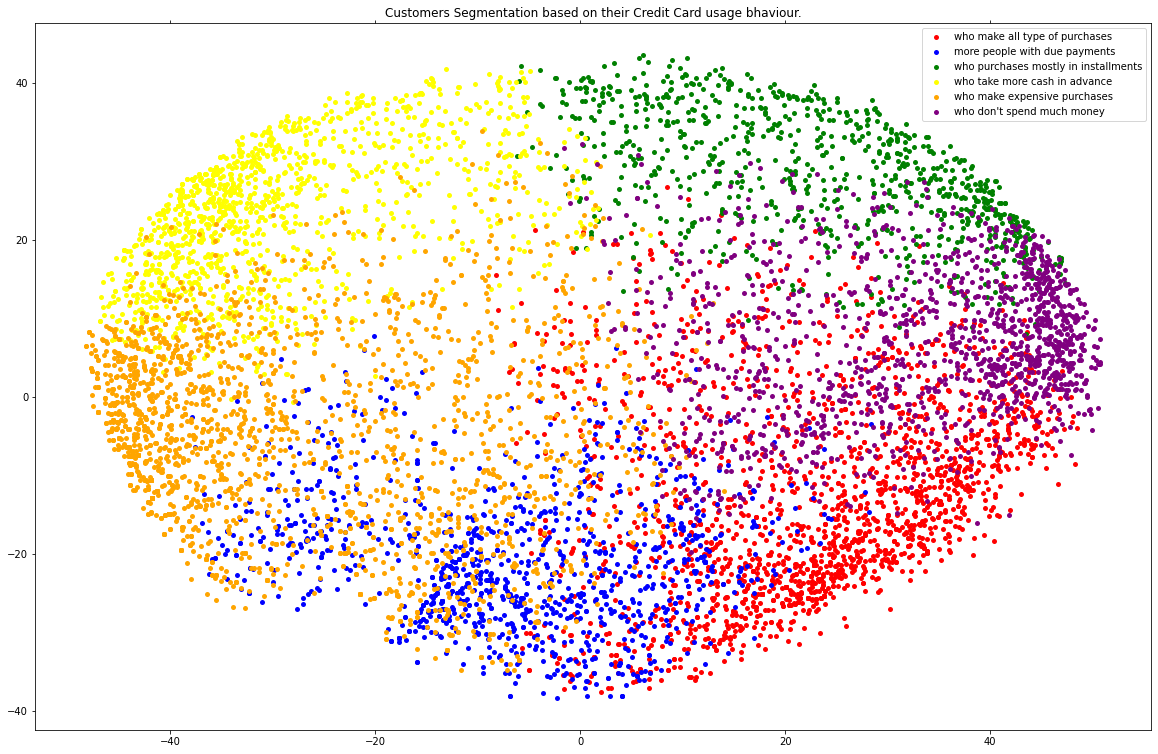

In [525]:
x, y = X_PCA[:, 0], X_PCA[:, 1]

colors = {0: 'red',
          1: 'blue',
          2: 'green', 
          3: 'yellow', 
          4: 'orange',  
          5:'purple'}

names = {0: 'who make all type of purchases', 
         1: 'more people with due payments', 
         2: 'who purchases mostly in installments', 
         3: 'who take more cash in advance', 
         4: 'who make expensive purchases',
         5:'who don\'t spend much money'}
  
df = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Customers Segmentation based on their Credit Card usage bhaviour.")
plt.show()

## Part 4: Getting the output

In [526]:
dr.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [527]:
labels.shape

(8950,)

In [528]:
labels = labels.reshape(len(labels), 1)

In [529]:
labels.shape

(8950, 1)

In [530]:
b = np.concatenate((labels, dr), axis=1)

In [531]:
dataset.columns

Index(['TENURE', 'BALANCE_RANGE', 'PURCHASES_RANGE', 'ONEOFF_PURCHASES_RANGE',
       'INSTALLMENTS_PURCHASES_RANGE', 'CASH_ADVANCE_RANGE',
       'CREDIT_LIMIT_RANGE', 'PAYMENTS_RANGE', 'MINIMUM_PAYMENTS_RANGE',
       'BALANCE_FREQUENCY_RANGE', 'PURCHASES_FREQUENCY_RANGE',
       'ONEOFF_PURCHASES_FREQUENCY_RANGE',
       'PURCHASES_INSTALLMENTS_FREQUENCY_RANGE',
       'CASH_ADVANCE_FREQUENCY_RANGE', 'PRC_FULL_PAYMENT_RANGE',
       'PURCHASES_TRX_RANGE', 'CASH_ADVANCE_TRX_RANGE'],
      dtype='object')

In [533]:
dataset_final = pd.DataFrame(data=b, columns = ['Cluster_Number', 'CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'])

In [534]:
dataset_final.head()

,Cluster_Number,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,4,C10001,40.900749,0.818182,95.4,0.0,95.4,0.0,0.166667,0.0,0.083333,0.0,0,2,1000.0,201.802084,139.509787,0.0,12
1,3,C10002,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.0,0.0,0.0,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,5,C10003,2495.148862,1.0,773.17,773.17,0.0,0.0,1.0,1.0,0.0,0.0,0,12,7500.0,622.066742,627.284787,0.0,12
3,4,C10004,1666.670542,0.636364,1499.0,1499.0,0.0,205.788017,0.083333,0.083333,0.0,0.083333,1,1,7500.0,0.0,NaN,0.0,12
4,4,C10005,817.714335,1.0,16.0,16.0,0.0,0.0,0.083333,0.083333,0.0,0.0,0,1,1200.0,678.334763,244.791237,0.0,12


In [535]:
dataset_final.to_csv('Segmented_customers')